In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

# prepare

In [31]:
data =  pd.read_csv('D:\DS_2nd_year\semester 2nd\[DS108]\TH\Lab1\covid_19_data.csv')
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [33]:
data_tmp = data.sort_values(by=['Country/Region','ObservationDate'])

data_tmp

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2737,2738,02/28/2020,NaN,Azerbaijan,2020-02-28T15:03:26,1.0,0.0,0.0
4770,4771,03/10/2020,NaN,"('St. Martin',)",2020-03-10T05:33:02,2.0,0.0,0.0
192466,192467,01/01/2021,NaN,Afghanistan,2021-04-02 15:13:53,51526.0,2191.0,41727.0
193229,193230,01/02/2021,NaN,Afghanistan,2021-04-02 15:13:53,51526.0,2191.0,41727.0
193992,193993,01/03/2021,NaN,Afghanistan,2021-04-02 15:13:53,51526.0,2191.0,41727.0
194756,194757,01/04/2021,NaN,Afghanistan,2021-04-02 15:13:53,53011.0,2237.0,42530.0
195520,195521,01/05/2021,NaN,Afghanistan,2021-04-02 15:13:53,53105.0,2244.0,42666.0
196284,196285,01/06/2021,NaN,Afghanistan,2021-04-02 15:13:53,53105.0,2244.0,42666.0
197048,197049,01/07/2021,NaN,Afghanistan,2021-04-02 15:13:53,53207.0,2253.0,43291.0
197812,197813,01/08/2021,NaN,Afghanistan,2021-04-02 15:13:53,53332.0,2257.0,43440.0


In [34]:
corona_df = pd.DataFrame()

for country in data_tmp['Country/Region'].unique():
    country_data = data_tmp[data_tmp['Country/Region'] == country]

    daily_count = country_data[['Confirmed','Deaths','Recovered']]

    daily_changes = daily_count.diff().iloc[1:]
    daily_changes.columns = ['DailyConfirmed','DailyDeaths','DailyRecovered']

    combined_data = pd.concat([country_data, daily_changes], axis=1)

    if corona_df is None:
        corona_df = combined_data.copy()
    else:
        corona_df = pd.concat([corona_df, combined_data])



In [35]:
corona_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,DailyConfirmed,DailyDeaths,DailyRecovered
2737,2738,02/28/2020,NaN,Azerbaijan,2020-02-28T15:03:26,1.0,0.0,0.0,NaN,NaN,NaN
4770,4771,03/10/2020,NaN,"('St. Martin',)",2020-03-10T05:33:02,2.0,0.0,0.0,NaN,NaN,NaN
192466,192467,01/01/2021,NaN,Afghanistan,2021-04-02 15:13:53,51526.0,2191.0,41727.0,NaN,NaN,NaN
193229,193230,01/02/2021,NaN,Afghanistan,2021-04-02 15:13:53,51526.0,2191.0,41727.0,0.0,0.0,0.0
193992,193993,01/03/2021,NaN,Afghanistan,2021-04-02 15:13:53,51526.0,2191.0,41727.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5252,5253,03/12/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0,0.0,0.0,0.0
5735,5736,03/14/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0,0.0,0.0,0.0
5995,5996,03/15/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0,0.0,0.0,0.0
6269,6270,03/16/2020,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0,0.0,0.0,0.0


# Câu a:

In [38]:
#liet ke so dong

print("- So dong: ",data.shape[0])

#liet ke so cot

print("- So cot: ",data.shape[1])

- So dong:  306429
- So cot:  8


In [39]:
#10 dong dau

print("10 dong dau:\n",data.head(10))

10 dong dau:
    SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   
5    6      01/22/2020      Guangdong  Mainland China  1/22/2020 17:00   
6    7      01/22/2020        Guangxi  Mainland China  1/22/2020 17:00   
7    8      01/22/2020        Guizhou  Mainland China  1/22/2020 17:00   
8    9      01/22/2020         Hainan  Mainland China  1/22/2020 17:00   
9   10      01/22/2020          Hebei  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4

In [40]:
#in ten cot

data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [41]:
#Cac quoc gia co dich Corona

countryCorona = data.loc[:,'Country/Region'].unique()
countryCorona

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [42]:
#So luong ca nhiem duoc xac nhan nhieu nhat

maxConfirmedCases = data['Confirmed'].max()
maxConfirmedCases

5863138.0

In [43]:
#Covid_19 tai Trung Quoc

coronaChina = data[data["Country/Region"] == "Mainland China"]
coronaChina

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306340,306341,05/29/2021,Tibet,Mainland China,2021-05-30 04:20:55,1.0,0.0,1.0
306368,306369,05/29/2021,Unknown,Mainland China,2021-05-30 04:20:55,0.0,0.0,10.0
306412,306413,05/29/2021,Xinjiang,Mainland China,2021-05-30 04:20:55,980.0,3.0,977.0
306420,306421,05/29/2021,Yunnan,Mainland China,2021-05-30 04:20:55,352.0,2.0,331.0


In [44]:
#Quoc gia co ca lay nhiem nhieu nhat:

maxCountryConfirmedCorona = data[data["Confirmed"] == maxConfirmedCases]['Country/Region']
maxCountryConfirmedCorona

298068    France
Name: Country/Region, dtype: object

In [47]:
#Tinh co ca nhiem nhieu nhat

maxStateConfirmedCorona = data[data["Confirmed"] == maxConfirmedCases]['Province/State']
maxStateConfirmedCorona

298068    NaN
Name: Province/State, dtype: object

In [49]:
#du lieu theo ngay thang

data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], infer_datetime_format=True)
data_jan = data[(data["ObservationDate"] >= '2020-01-01') & (data["ObservationDate"] <= '2020-01-31')]
data_jan

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39628\2442506171.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], infer_datetime_format=True)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
508,509,2020-01-31,NaN,Philippines,1/31/2020 23:59,1.0,0.0,0.0
509,510,2020-01-31,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
510,511,2020-01-31,NaN,Sweden,1/31/2020 23:59,1.0,0.0,0.0
511,512,2020-01-31,Unknown,China,1/31/2020 23:59,0.0,0.0,0.0


# Câu b:  
Tìm dữ liệu về số ca lây nhiễm tại Vietnam (Country.Region == 'Vietnam') và lưu vào biến coronaVietnam.

In [45]:
coronaVietnam = data[data["Country/Region"] == "Vietnam"]
coronaVietnam

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
81,82,01/23/2020,NaN,Vietnam,1/23/20 17:00,2.0,0.0,0.0
127,128,01/24/2020,NaN,Vietnam,1/24/20 17:00,2.0,0.0,0.0
170,171,01/25/2020,NaN,Vietnam,1/25/20 17:00,2.0,0.0,0.0
218,219,01/26/2020,NaN,Vietnam,1/26/20 16:00,2.0,0.0,0.0
267,268,01/27/2020,NaN,Vietnam,1/27/20 23:59,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302771,302772,05/25/2021,NaN,Vietnam,2021-05-26 04:20:35,5931.0,44.0,2794.0
303536,303537,05/26/2021,NaN,Vietnam,2021-05-27 04:20:59,6086.0,45.0,2853.0
304301,304302,05/27/2021,NaN,Vietnam,2021-05-28 04:20:36,6356.0,46.0,2853.0
305066,305067,05/28/2021,NaN,Vietnam,2021-05-29 04:20:41,6396.0,47.0,2896.0


# Câu c:
Tìm dữ liệu về số ca lây nhiễm tại Việt Nam trong tháng 02 năm 2021

In [50]:
vietnam_feb = coronaVietnam[(coronaVietnam['ObservationDate'].dt.month == 2) & (coronaVietnam['ObservationDate'].dt.year == 2021)]
vietnam_feb

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
216326,216327,2021-02-01,NaN,Vietnam,2021-04-02 15:13:53,1850.0,35.0,1460.0
217091,217092,2021-02-02,NaN,Vietnam,2021-04-02 15:13:53,1882.0,35.0,1460.0
217856,217857,2021-02-03,NaN,Vietnam,2021-04-02 15:13:53,1948.0,35.0,1461.0
218621,218622,2021-02-04,NaN,Vietnam,2021-04-02 15:13:53,1957.0,35.0,1465.0
219386,219387,2021-02-05,NaN,Vietnam,2021-04-02 15:13:53,1976.0,35.0,1465.0
220151,220152,2021-02-06,NaN,Vietnam,2021-04-02 15:13:53,1985.0,35.0,1468.0
220916,220917,2021-02-07,NaN,Vietnam,2021-04-02 15:13:53,2001.0,35.0,1472.0
221681,221682,2021-02-08,NaN,Vietnam,2021-04-02 15:13:53,2050.0,35.0,1472.0
222446,222447,2021-02-09,NaN,Vietnam,2021-04-02 15:13:53,2064.0,35.0,1472.0
223211,223212,2021-02-10,NaN,Vietnam,2021-04-02 15:13:53,2091.0,35.0,1480.0


# Câu d: 
In ra số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Việt Nam (Lấy năm 2021).

In [36]:
corona_df['ObservationDate'] = pd.to_datetime(corona_df['ObservationDate'], infer_datetime_format=True)

vietnam_cases_jan_feb = corona_df[(corona_df["Country/Region"] == "Vietnam") & 
                             ((corona_df["ObservationDate"].dt.month == 1) | (corona_df["ObservationDate"].dt.month == 2)) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxV_jan_feb_21 = vietnam_cases_jan_feb["DailyConfirmed"].max()
print("Số ca lây nhiễm nhiều nhất trên khoảng tháng 01 và 02 tại VN: ", maxV_jan_feb_21)

Số ca lây nhiễm nhiều nhất trên khoảng tháng 01 và 02 tại VN:  2432.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_39628\2176718438.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  corona_df['ObservationDate'] = pd.to_datetime(corona_df['ObservationDate'], infer_datetime_format=True)


# Câu e: 
Thực hiện tương tự câu d cho Indonesia và Philipine

In [54]:
#Indonesia

IndoCases_jan_feb = corona_df[(corona_df["Country/Region"] == "Indonesia") & 
                             ((corona_df["ObservationDate"].dt.month == 1) | (corona_df["ObservationDate"].dt.month == 2)) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxIndoCases_jan_feb = IndoCases_jan_feb["DailyConfirmed"].max()
print("Số ca lây nhiễm nhiều nhất trên khoảng tháng 01 và 02 tại Indonesia: ", maxIndoCases_jan_feb)

Số ca lây nhiễm nhiều nhất trên khoảng tháng 01 và 02 tại Indonesia:  14518.0


In [55]:
#Philippine

PhilippineCases_jan_feb = corona_df[(corona_df["Country/Region"] == "Philippines") & 
                             ((corona_df["ObservationDate"].dt.month == 1) | (corona_df["ObservationDate"].dt.month == 2)) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxPhilippineCases_jan_feb = PhilippineCases_jan_feb["DailyConfirmed"].max()
print("Số ca lây nhiễm nhiều nhất trên khoảng tháng 01 và 02 tại Philippine: ", maxPhilippineCases_jan_feb)

Số ca lây nhiễm nhiều nhất trên khoảng tháng 01 và 02 tại Philippine:  576349.0


**Câu e:  In ra dữ liệu về ca nhiễm ghi nhân (Confirmed) của Trung Quốc trong khoảng thời
gian từ 01/02/2021 cho đến 15/02/2021. In ra màn hình sử dụng lệnh print()**

In [54]:
ConfirmedCasesChina = coronaChina[(coronaChina["Confirmed"] != 0) & (coronaChina["ObservationDate"] >= '2021-02-01') & (coronaChina["ObservationDate"] <= '2021-02-15')]
print(ConfirmedCasesChina)

Empty DataFrame
Columns: [SNo, ObservationDate, Province/State, Country/Region, Last Update, Confirmed, Deaths, Recovered]
Index: []


# Câu f: 
Thống kê số lượng record theo từng tỉnh của Trung Quốc trong tháng 02/2021.

In [57]:

coronaChina['ObservationDate'] = pd.to_datetime(coronaChina['ObservationDate'], infer_datetime_format=True)
chinaFeb2021 = coronaChina[(coronaChina['ObservationDate'].dt.month == 2) & 
                           (coronaChina['ObservationDate'].dt.year == 2021)]

chinaFeb2021.groupby(['Province/State']).count()[['ObservationDate']]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15104\4063466305.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  coronaChina['ObservationDate'] = pd.to_datetime(coronaChina['ObservationDate'], infer_datetime_format=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15104\4063466305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coronaChina['ObservationDate'] = pd.to_datetime(coronaChina['ObservationDate'], infer_datetime_format=True)


,ObservationDate
Province/State,
Anhui,28
Beijing,28
Chongqing,28
Fujian,28
Gansu,28
Guangdong,28
Guangxi,28
Guizhou,28
Hainan,28


# Câu g: 
Đếm số lượng ca nhiễm theo từng tỉnh của Trung Quốc trong tháng 02/2021.

In [62]:
chinaFeb2021.groupby(['Province/State'])['Confirmed'].max()

Province/State
Anhui               994.0
Beijing            1049.0
Chongqing           591.0
Fujian              551.0
Gansu               187.0
Guangdong          2212.0
Guangxi             267.0
Guizhou             147.0
Hainan              171.0
Hebei              1317.0
Heilongjiang       1610.0
Henan              1304.0
Hubei             68151.0
Hunan              1036.0
Inner Mongolia      367.0
Jiangsu             704.0
Jiangxi             935.0
Jilin               573.0
Liaoning            406.0
Ningxia              75.0
Qinghai              18.0
Shaanxi             551.0
Shandong            869.0
Shanghai           1796.0
Shanxi              240.0
Sichuan             900.0
Tianjin             356.0
Tibet                 1.0
Unknown               1.0
Xinjiang            980.0
Yunnan              233.0
Zhejiang           1321.0
Name: Confirmed, dtype: float64

# Câu h: 
Tìm dữ liệu ca tử vong của Trung Quốc trong khoảng thời gian từ 01/02/2021 cho đến 15/02/2021. In ra màn hình sử dụng lệnh print().

In [63]:
china_deaths_feb21 = coronaChina[(coronaChina['Deaths'] != 0) &
                                 ((coronaChina['ObservationDate'].dt.day >= 1) |
                                  (coronaChina['ObservationDate'].dt.day <= 15)) &
                                  (coronaChina['ObservationDate'].dt.month == 2) &
                                  (coronaChina['ObservationDate'].dt.year == 2021)]
print(china_deaths_feb21)

           SNo ObservationDate Province/State  Country/Region  \
216353  216354      2021-02-01          Anhui  Mainland China   
216387  216388      2021-02-01        Beijing  Mainland China   
216437  216438      2021-02-01      Chongqing  Mainland China   
216479  216480      2021-02-01         Fujian  Mainland China   
216484  216485      2021-02-01          Gansu  Mainland China   
...        ...             ...            ...             ...   
237457  237458      2021-02-28        Sichuan  Mainland China   
237489  237490      2021-02-28        Tianjin  Mainland China   
237562  237563      2021-02-28       Xinjiang  Mainland China   
237570  237571      2021-02-28         Yunnan  Mainland China   
237576  237577      2021-02-28       Zhejiang  Mainland China   

                Last Update  Confirmed  Deaths  Recovered  
216353  2021-04-02 15:13:53      994.0     6.0      987.0  
216387  2021-04-02 15:13:53     1039.0     9.0      977.0  
216437  2021-04-02 15:13:53      591.0 

# Câu i(*): 
Có nhận xét gì về số ca nhiễm mới tại Việt Nam giữa tháng 05/2020 và tháng 05/2021. Vẽ biểu đồ đường thể hiện số ca nhiễm mới trong 2 tháng trên.

In [58]:
coronaVietnam = coronaVietnam.sort_values(by='ObservationDate')
coronaVietnam['DailyConfirmed'] = coronaVietnam['Confirmed'].diff()

vienamcases_may20 = coronaVietnam[(coronaVietnam['ObservationDate'].dt.month == 5) & 
                                  (coronaVietnam['ObservationDate'].dt.year == 2020)]

vienamcases_may21 = coronaVietnam[(coronaVietnam['ObservationDate'].dt.month == 5) & 
                                  (coronaVietnam['ObservationDate'].dt.year == 2021)]


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,DailyConfirmed
284411,284412,2021-05-01,NaN,Vietnam,2021-05-02 04:20:48,2942.0,35.0,2548.0,14.0
285176,285177,2021-05-02,NaN,Vietnam,2021-05-03 04:20:39,2962.0,35.0,2549.0,20.0
285941,285942,2021-05-03,NaN,Vietnam,2021-05-04 04:20:34,2985.0,35.0,2560.0,23.0
286706,286707,2021-05-04,NaN,Vietnam,2021-05-05 04:20:43,2995.0,35.0,2560.0,10.0
287471,287472,2021-05-05,NaN,Vietnam,2021-05-06 04:20:38,3030.0,35.0,2560.0,35.0
288236,288237,2021-05-06,NaN,Vietnam,2021-05-07 04:20:40,3090.0,35.0,2560.0,60.0
289001,289002,2021-05-07,NaN,Vietnam,2021-05-08 04:21:04,3137.0,35.0,2560.0,47.0
289766,289767,2021-05-08,NaN,Vietnam,2021-05-09 04:20:35,3245.0,35.0,2602.0,108.0
290531,290532,2021-05-09,NaN,Vietnam,2021-05-10 04:20:38,3412.0,35.0,2602.0,167.0
291296,291297,2021-05-10,NaN,Vietnam,2021-05-11 04:20:41,3489.0,35.0,2618.0,77.0


Text(0.5, 1.0, 'New confirmed cases in 05/2020')

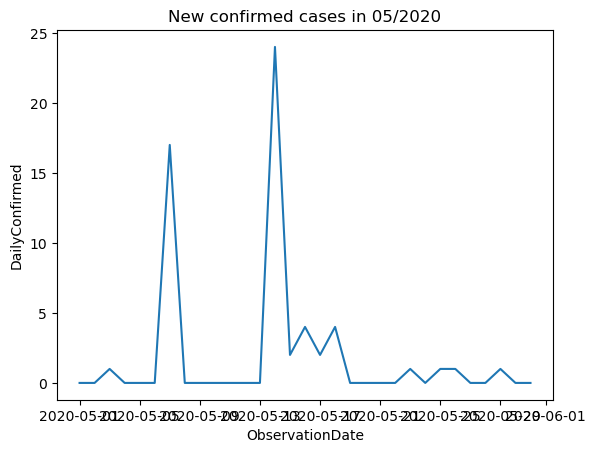

In [83]:
#new confirmed cases 05/2020
sns.lineplot(data=vienamcases_may20, x="ObservationDate", y="DailyConfirmed")
plt.title('New confirmed cases in 05/2020') 


Text(0.5, 1.0, 'New confirmed cases in 05/2021')

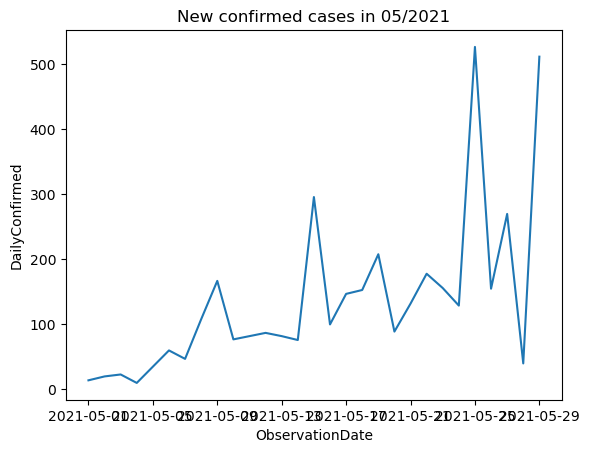

In [84]:
#new confirmed cases 05/2021
sns.lineplot(data=vienamcases_may21, x="ObservationDate", y="DailyConfirmed")
plt.title('New confirmed cases in 05/2021') 


# Câu k(*): 
Vẽ biểu đồ về số ca lây nhiễm nhiều nhất của 3 quốc gia: Vietnam, Indonesia và Philippine trong 2 tháng gồm 01 và tháng 02 năm 2021.

In [69]:
#find max 

#vietnam
vn_jan = corona_df[(corona_df["Country/Region"] == "Vietnam") & 
                             (corona_df["ObservationDate"].dt.month == 1) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxVN_jan_21 = vietnam_cases_jan_feb["DailyConfirmed"].max()

vn_feb = corona_df[(corona_df["Country/Region"] == "Vietnam") & 
                             (corona_df["ObservationDate"].dt.month == 2) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxVN_feb_21 = vietnam_cases_jan_feb["DailyConfirmed"].max()

#philippine
Philippine_jan = corona_df[(corona_df["Country/Region"] == "Philippines") & 
                             (corona_df["ObservationDate"].dt.month == 1) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxPhilippine_jan_21 = Philippine_jan["DailyConfirmed"].max()

Philippine_feb = corona_df[(corona_df["Country/Region"] == "Philippines") & 
                             (corona_df["ObservationDate"].dt.month == 2) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxPhilippine_feb_21 = Philippine_feb["DailyConfirmed"].max()

#indonesia
Indonesia_jan = corona_df[(corona_df["Country/Region"] == "Indonesia") & 
                             (corona_df["ObservationDate"].dt.month == 1) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxIndonesia_jan_21 = Indonesia_jan["DailyConfirmed"].max()

Indonesia_feb = corona_df[(corona_df["Country/Region"] == "Indonesia") & 
                             (corona_df["ObservationDate"].dt.month == 2) & 
                             (corona_df["ObservationDate"].dt.year == 2021)]
maxIndonesia_feb_21 = Indonesia_feb["DailyConfirmed"].max()

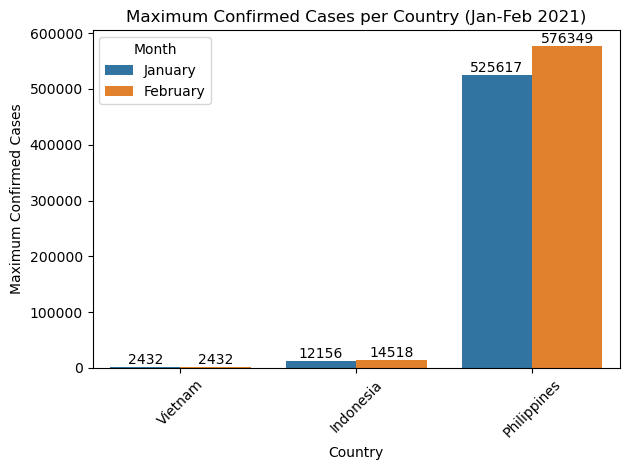

In [70]:

month_names = ["January", "February"]
countries = ["Vietnam", "Indonesia", "Philippines"]
max_confirmed_jan = [maxVN_jan_21, maxIndonesia_jan_21, maxPhilippine_jan_21]
max_confirmed_feb = [maxVN_feb_21, maxIndonesia_feb_21, maxPhilippine_feb_21]

data = {
    "Country": countries * 2,
    "Month": month_names * 3,
    "Maximum Confirmed Cases": max_confirmed_jan + max_confirmed_feb
}

ax = sns.barplot(
    x="Country",
    y="Maximum Confirmed Cases",
    hue="Month",
    data=data
)

for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Maximum Confirmed Cases')
plt.title('Maximum Confirmed Cases per Country (Jan-Feb 2021)')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.show()